In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
Vorname_list = [
    "Adelina",
    "Johannes",
    "Lucia",
    "Anne",
    "Frank",
    "Fabian",
    "Robin",
    "Raphael",
    "Silke",
    "Kerstin",
    "Arno",
    "Marcus",
    "Alfons",
    "Nils",
    "Tim",
    "Achim",
    "Igor",
    "Lukas"
]

In [16]:
df_origin = pd.read_excel("Personalplanung Engineering - 2025.xlsx", sheet_name="Kapazität intern 2025", header=1)
df_origin = pd.DataFrame(df_origin)

df = df_origin.drop(df_origin.index[-7:], inplace=False)
df = df.drop(df_origin.index[:4])
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 371'])

df.rename(columns={'heute': 'Name', 'Unnamed: 2': 'Vorname'}, inplace=True)

df.columns = df.columns.astype(str)
df.columns = [col.replace(' 00:00:00', '') if i >= 2 and i < 367 else col for i, col in enumerate(df.columns)]


df = df.fillna('X')

C:\Users\yuli\AppData\Local\Temp\ipykernel_25708\1824183834.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna('X')


### Delete the rows who are not "Technische Zeichner/in"

In [17]:

df = df[df['Vorname'].isin(Vorname_list)]

In [18]:
df.iloc[:, 2:] = df.iloc[:, 2:].astype(str)
df.reset_index(drop=True, inplace=True)

C:\Users\yuli\AppData\Local\Temp\ipykernel_25708\2701716210.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4     0
5     0
7     0
9     0
10    0
11    0
13    0
15    0
16    0
17    0
18    0
20    0
21    0
22    0
24    0
26    0
28    0
30    0
Name: 2025-01-04, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = df.iloc[:, 2:].astype(str)
C:\Users\yuli\AppData\Local\Temp\ipykernel_25708\2701716210.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4     0
5     0
7     0
9     0
10    0
11    0
13    0
15    0
16    0
17    0
18    0
20    0
21    0
22    0
24    0
26    0
28    0
30    0
Name: 2025-01-05, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = df.iloc[:, 2:].astype(str)
C:\Users\yul

In [19]:
print(df.columns)
print(df.iloc[1,1])
print(type(df.iloc[1,110]))

Index(['Name', 'Vorname', '2025-01-01', '2025-01-02', '2025-01-03',
       '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
       ...
       '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26',
       '2025-12-27', '2025-12-28', '2025-12-29', '2025-12-30', '2025-12-31'],
      dtype='object', length=367)
Johannes
<class 'str'>


In [20]:
global Nr_Zeichner
Nr_Zeichner = len(df)

def workdays_monthly(df, month):
    # 筛选出指定月份的列
    month_columns = [col for col in df.columns[2:] if col.startswith(f"2025-{month:02d}")]
    
    # 计算每个员工在该月份的工作天数
    df['Working Days'] = df.loc[0:Nr_Zeichner+1, month_columns].apply(lambda row: row.isin(['h', '1']).sum(), axis=1)
    
    # 绘制结果图表
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.loc[0:Nr_Zeichner+1, 'Vorname'], df.loc[0:Nr_Zeichner+1, 'Working Days'], color='skyblue')
    plt.xlabel('Employee')
    plt.ylabel('Number of Working Days')
    plt.title(f'Number of Working Days in {month:02d}/2025')
    plt.xticks(rotation=45)
    
    # 在每个数据条上显示具体的天数
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

C:\Users\yuli\AppData\Local\Temp\ipykernel_25708\891050415.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Working Days'] = df.loc[0:Nr_Zeichner+1, month_columns].apply(lambda row: row.isin(['h', '1']).sum(), axis=1)


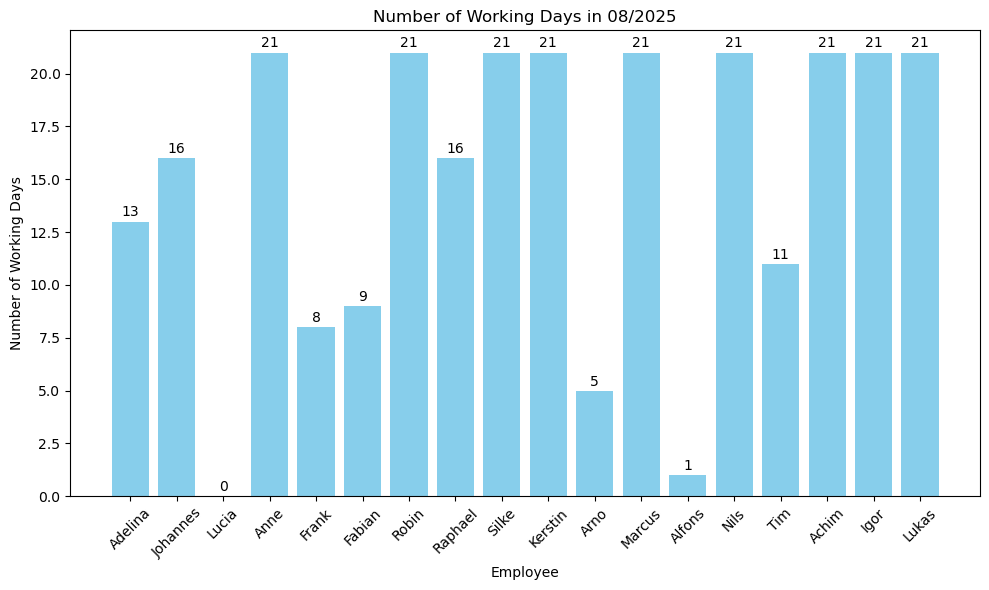

In [21]:
workdays_monthly(df, 8)

## Workers' working days per month

In [22]:
def employee_working_days(df, employee_name):
    # 筛选出指定员工的行
    employee_row = df[df['Vorname'] == employee_name]
    
    # 初始化一个字典来存储每个月的工作天数
    working_days_per_month = {}
    
    # 遍历所有月份
    for month in range(1, 13):
        # 筛选出指定月份的列
        month_columns = [col for col in df.columns[2:] if col.startswith(f"2025-{month:02d}")]
        
        # 计算该员工在该月份的工作天数
        working_days = employee_row[month_columns].apply(lambda row: row.isin(['h', '1']).sum(), axis=1).values[0]
        
        # 将结果存储在字典中
        working_days_per_month[f"2025-{month:02d}"] = working_days
    
    # 绘制结果图表
    plt.figure(figsize=(10, 6))
    plt.bar(working_days_per_month.keys(), working_days_per_month.values(), color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Number of Working Days')
    plt.title(f'{employee_name} in 2025')
    plt.xticks(rotation=45)
    
    # 在每个数据条上显示具体的天数
    for month, days in working_days_per_month.items():
        plt.text(month, days + 0.1, int(days), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


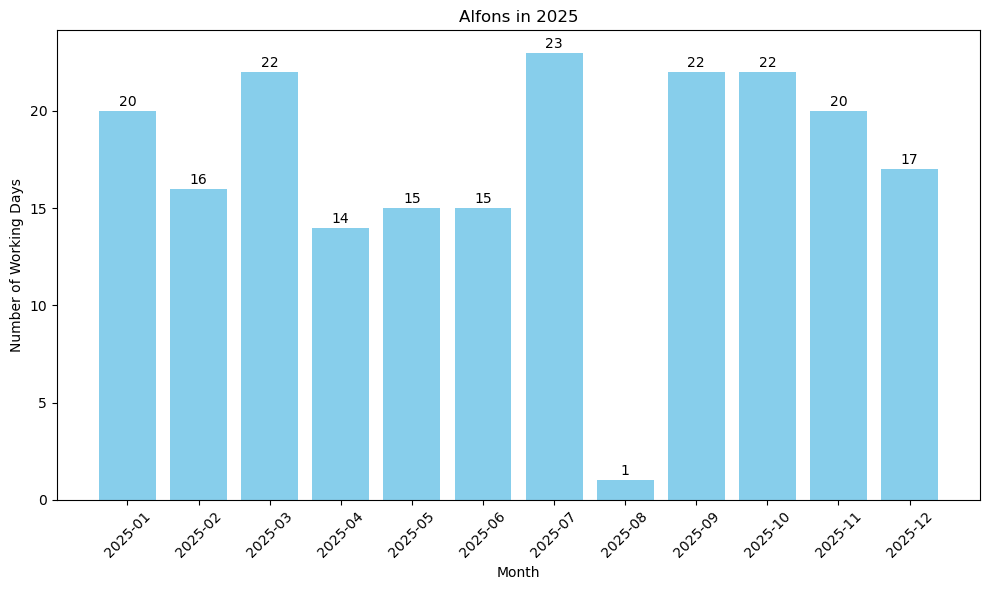

In [23]:
employee_working_days(df, "Alfons")

## Check in the given time all available time

In [ ]:
def check_given_time(start_time, end_time):
    time_columns = [col for col in df.columns[2:] if start_time <= col <= end_time]

    df['Working Days'] = df.loc[0:Nr_Zeichner+1, time_columns].apply(lambda row: row.isin(['h', '1']).sum(), axis=1)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.loc[0:Nr_Zeichner+1, 'Vorname'], df.loc[0:Nr_Zeichner+1, 'Working Days'], color='skyblue')
    plt.xlabel('Employee')
    plt.ylabel('Number of Working Days')
    plt.title(f'Number of Working Days in {start_time} -- {end_time}')
    plt.xticks(rotation=45)
    

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show(block=False)

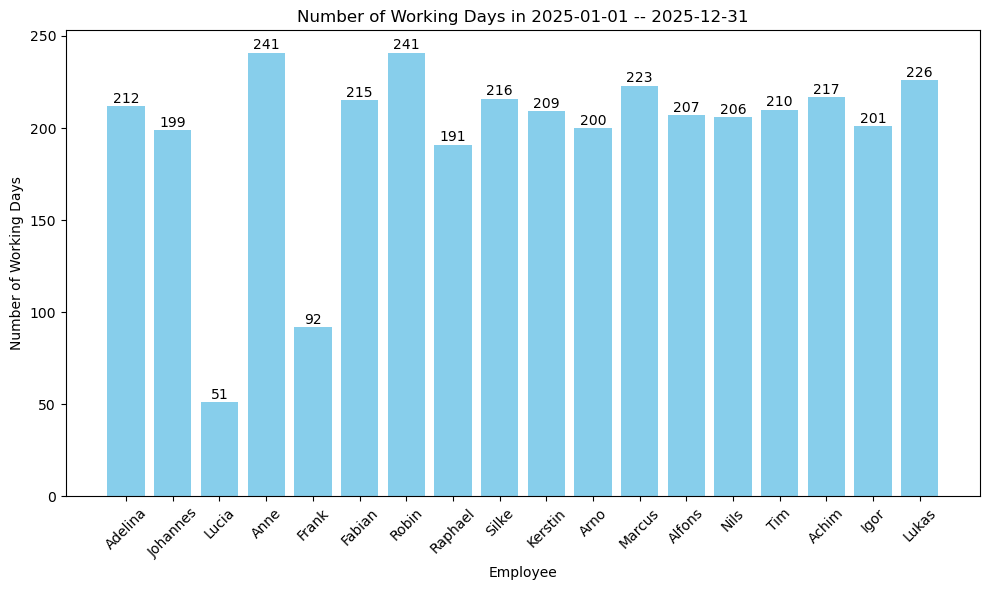

In [29]:
check_given_time("2025-01-01", "2025-12-31")